In [ ]:
#| default_exp segmentation

# Core Fuctions
> fastai를 이용해 세그먼테이션 모델을 학습시키는 방법입니다.

In [1]:
#| export
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels' /f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.793195,2.155918,00:11


epoch,train_loss,valid_loss,time
0,1.573411,1.375205,00:03
1,1.400958,1.198523,00:02
2,1.314550,1.066260,00:02
3,1.199907,0.934652,00:02
4,1.080420,0.889541,00:02
5,0.976421,0.766655,00:02
6,0.892922,0.737130,00:02
7,0.828766,0.724382,00:02


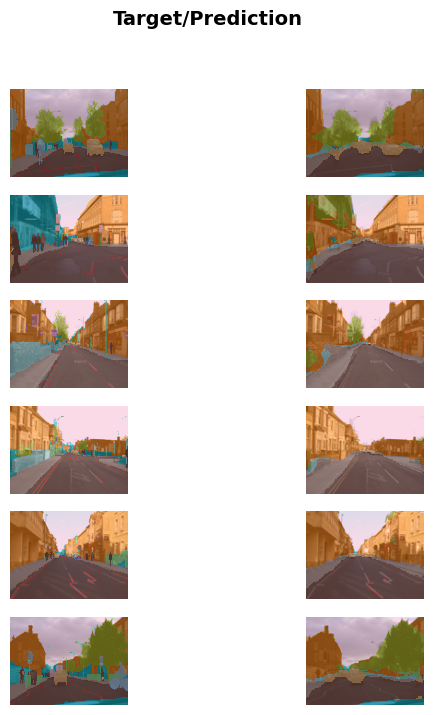

In [2]:
learn.show_results(max_n=6, figsize=(7,8))